In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import pyproj
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 10
import folium
import glob
import io
import ipyleaflet
import IPython.display
import ipyvolume.pylab as p3
import json
import matplotlib.cm
import matplotlib.pyplot as plt
import os
import pdal
import PIL
import requests
import shapely.geometry
import scipy.spatial
import sys
import urllib.request
import geopandas as gpd

import psycopg2  # (if it is postgres/postgis)



In [35]:
# corridor = geopandas.read_file("/media/DATADRIVE/walkability/corrs.shp", encoding="utf-8")
# sw_mtm3 = geopandas.read_file("/media/DATADRIVE/walkability/Sidewalk_Inventory_mtm3.shp", encoding="utf-8")
con = psycopg2.connect(database="walkability", user="postgres", password="1234",
    host="localhost")

sql = "select * from ped_net"

sidewalks = gpd.GeoDataFrame.from_postgis(sql, con, geom_col='geom' )

sql = "select * from compliance.centerlines"

centerlines = gpd.GeoDataFrame.from_postgis(sql, con, geom_col='geom' )



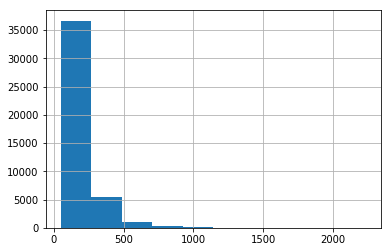

In [72]:
l = sidewalks.length
l.sort_values().tail(10)
sidewalks = sidewalks[sidewalks.length <2500]

sidewalks.length.hist()

In [54]:
midpoints = []
sidewalks = sidewalks[sidewalks.length >50]

for idx,sidewalk in sidewalks.iterrows():
    #Ziv 
    almost_start = sidewalk.geom.interpolate(sidewalk.geom.length*.05, normalized = True)

    q2 = sidewalk.geom.interpolate(sidewalk.geom.length*.25, normalized = True)

    mid_point = sidewalk.geom.interpolate(sidewalk.geom.length*.5, normalized = True)
    
    q3 = sidewalk.geom.interpolate(sidewalk.geom.length*.75, normalized = True)

    almost_end = sidewalk.geom.interpolate(sidewalk.geom.length*.95, normalized = True)
    rec = {'sd_gid':sidewalk.gid,'geom':almost_start}
    midpoints.append(rec)    
    rec = {'sd_gid':sidewalk.gid,'geom':mid_point}
    midpoints.append(rec)
    rec = {'sd_gid':sidewalk.gid,'geom':q2}
    midpoints.append(rec)
    rec = {'sd_gid':sidewalk.gid,'geom':q3}
    midpoints.append(rec)
    rec = {'sd_gid':sidewalk.gid,'geom':almost_end}
    midpoints.append(rec)
    

In [52]:
midpoints = gpd.GeoDataFrame(midpoints,geometry='geom')

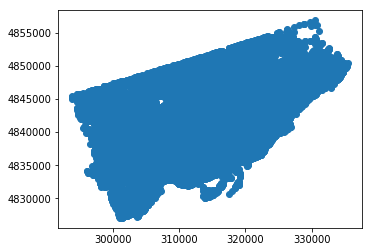

In [53]:
midpoints.plot()

In [50]:
idxs = []
for idx,line in sidewalks.iterrows():
    if len(sidewalks[sidewalks.geom_equals_exact(line.geom,1)].index) > 1:
        print("Hi Ziv I do QA better than you",idx, line.gid)
        idxs.append(idx)
print("Percentage of some data that is shit %s" % (len(idxs/len(sidewalks))))
sidewalks.drop(idxs, inplace=True)

Hi Ziv I do QA better than you 6 7
Hi Ziv I do QA better than you 17 25
Hi Ziv I do QA better than you 31 46
Hi Ziv I do QA better than you 34 49
Hi Ziv I do QA better than you 35 50
Hi Ziv I do QA better than you 36 51
Hi Ziv I do QA better than you 37 52
Hi Ziv I do QA better than you 38 53
Hi Ziv I do QA better than you 40 55
Hi Ziv I do QA better than you 41 56
Hi Ziv I do QA better than you 42 57
Hi Ziv I do QA better than you 45 60
Hi Ziv I do QA better than you 46 61
Hi Ziv I do QA better than you 47 62
Hi Ziv I do QA better than you 48 63
Hi Ziv I do QA better than you 242 277
Hi Ziv I do QA better than you 255 292
Hi Ziv I do QA better than you 320 364
Hi Ziv I do QA better than you 448 501
Hi Ziv I do QA better than you 488 542
Hi Ziv I do QA better than you 566 622
Hi Ziv I do QA better than you 579 635


KeyboardInterrupt: 

In [42]:
 s = sidewalks[sidewalks.geom_equals_exact(line.geom,1)]

1